## Stock Market Price Prediction using Multiple Linear Regression

Created by: Ardian Kris Bramantyo

Date: June 22, 2022

### Import Libraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
df = pd.read_csv('S&P500_Stock_Data.csv')

### Data Exploration

In [4]:
df

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
...,...,...,...
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981


In [5]:
df.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


### Data Visualization

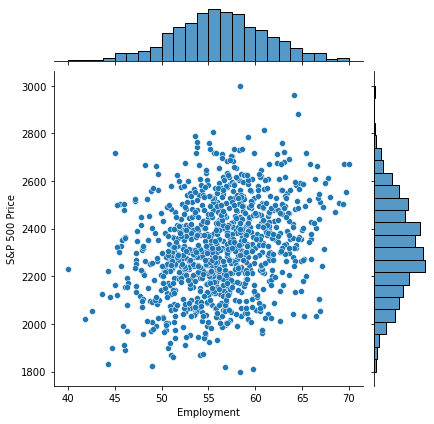

In [7]:
sns.jointplot(x='Employment', y='S&P 500 Price', data=df)

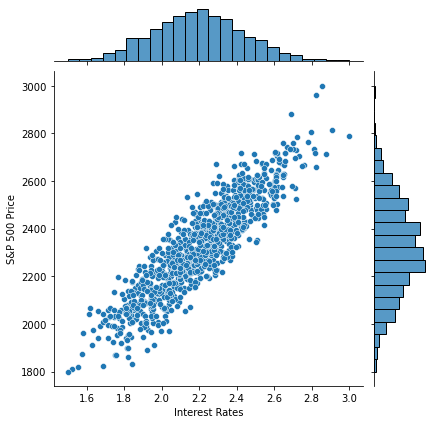

In [8]:
sns.jointplot(x='Interest Rates', y='S&P 500 Price', data=df)

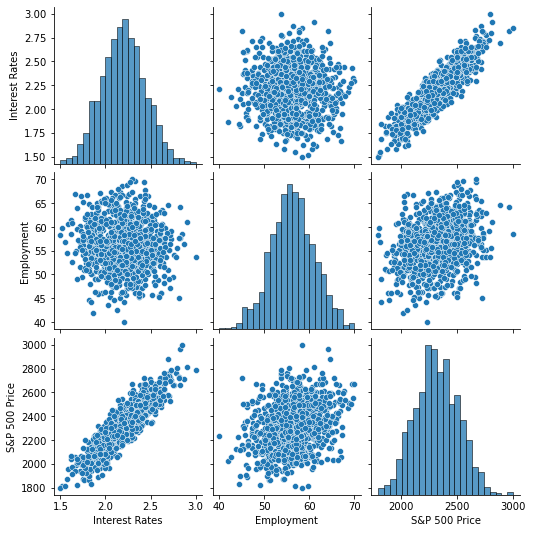

In [9]:
sns.pairplot(df)

### Create Testing and Training Dataset

In [10]:
y = df['S&P 500 Price']

In [15]:
y.head()

0    2206.680582
1    2486.474488
2    2405.868337
3    2140.434475
4    2411.275663
Name: S&P 500 Price, dtype: float64

In [12]:
X = df[['Interest Rates', 'Employment']]

In [14]:
X.head()

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [126]:
X_train

,Interest Rates,Employment
129,2.196862,61.003987
943,1.747024,58.056279
195,2.177419,60.901054
967,2.480717,64.678546
125,1.929237,50.499828
...,...,...
524,2.506804,61.371332
199,2.352228,62.712209
180,2.032821,64.898503
526,2.056775,55.993232


In [127]:
X_test

,Interest Rates,Employment
590,2.588366,48.889704
47,1.821981,64.827147
502,2.198281,58.930518
846,2.145747,61.382160
956,2.177226,55.356856
...,...,...
903,2.277362,48.052392
808,1.960792,59.868800
509,1.843878,59.693868
505,1.866020,52.136442


### Model Training

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
regressor = LinearRegression(fit_intercept = True)

In [130]:
regressor.fit(X_train, y_train)

LinearRegression()

In [131]:
print('Linear Model Coefficients (m) ', regressor.coef_)
print('Linear Model Coefficients (b) ', regressor.intercept_)

Linear Model Coefficients (m)  [721.32379643  12.74415424]
Linear Model Coefficients (b)  20.175669202239078


### Evaluating the Model

In [132]:
y_predict = regressor.predict(X_test)
y_predict

array([2510.28351779, 2160.58122202, 2356.8678203 , 2350.21776303,
       2296.13660955, 2041.38488297, 2426.56249316, 2380.32845805,
       2402.3046073 , 2615.52533671, 2445.16427765, 1877.94421061,
       2279.74060529, 2258.87726531, 2111.83333839, 2149.7666349 ,
       2632.13649802, 2025.41538972, 1996.63522705, 2153.95040465,
       2103.91265018, 2148.69603873, 2215.80570609, 2291.40748455,
       2278.94006251, 2199.59133795, 2250.48670196, 2163.21721017,
       2219.0677844 , 2059.03653219, 2093.03961873, 2823.25248091,
       2113.84697012, 2416.77610178, 2460.20903563, 2269.6834104 ,
       2398.81927838, 2248.17464479, 2271.3914525 , 2200.91559062,
       2130.73527661, 2422.200212  , 2505.83019543, 2599.12064417,
       2545.04704593, 2120.33461667, 2213.70018237, 2155.18299759,
       2584.6826778 , 2549.72576404, 2311.97230625, 2150.98492969,
       2434.04360101, 2250.16273581, 2378.99166008, 2126.42748717,
       2330.0885892 , 2631.72846677, 2521.62171731, 2506.33462

In [133]:
y_test

590    2556.018055
47     2136.421802
502    2214.107720
846    2327.283786
956    2269.050696
          ...     
903    2327.118323
808    2133.682183
509    2072.484866
505    2207.331004
608    2320.415035
Name: S&P 500 Price, Length: 250, dtype: float64

### Model Prediction vs. True Value Plot

Text(0.5, 1.0, 'Linear Regression Predictions')

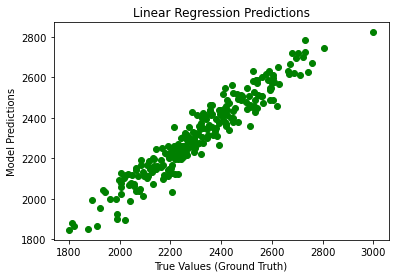

In [134]:
plt.scatter(y_test, y_predict, color = 'green')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Linear Regression Predictions')

In [135]:
k = X_test.shape[1] #to get value 2 from the X_test table
n = len(X_test) #to get how many parameters on X_test

In [136]:
k

2

In [137]:
n

250

In [138]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adjust_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test-y_predict)/y_test))*100

In [139]:
print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nR2', r2, '\nAdjusted R2 = ', adjust_r2, '\nMAPE = ', MAPE)

RMSE =  59.974 
MSE =  3596.839661635592 
MAE =  48.34947344664456 
R2 0.9169689360845323 
Adjusted R2 =  0.9162966197775245 
MAPE =  2.1038610265020035


### Result
#### 25% Testing, 75% Training

RMSE =  59.974

MSE =  3596.839661635592 

MAE =  48.34947344664456 

R2 0.9169689360845323 

Adjusted R2 =  0.9162966197775245 

MAPE =  2.1038610265020035

### Model Result Visualization

In [140]:
from mpl_toolkits.mplot3d import Axes3D

In [155]:
x_surf, y_surf = np.meshgrid(np.linspace(df['Interest Rates'].min(), df['Interest Rates'].max(), 100), np.linspace(df['Employment'].min(), df['Employment'].max(), 100))

In [156]:
x_surf.shape

(100, 100)

In [144]:
onlyX = pd.DataFrame({'Interest Rates' : x_surf.ravel(), 'Employment': y_surf.ravel() })

In [145]:
onlyX.shape

(10000, 2)

In [153]:
fittedY = regressor.predict(onlyX)

In [154]:
fittedY.shape

(10000,)

In [159]:
fittedY = fittedY.reshape(x_surf.shape)

In [160]:
fittedY.shape

(100, 100)

Text(0.5, 0, 'Stock Index Price')

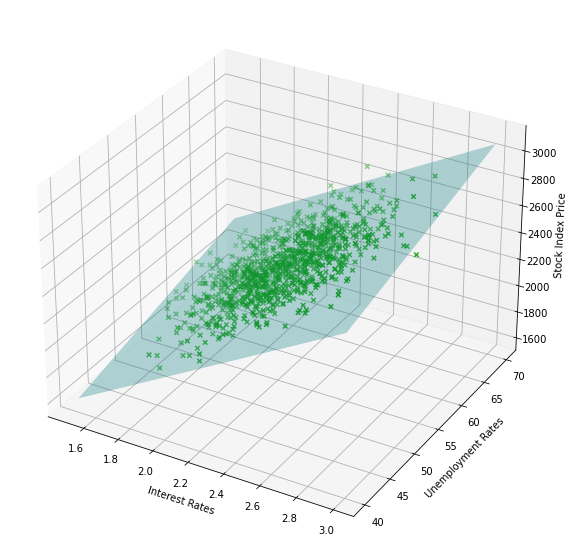

In [180]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( df['Interest Rates'], df['Employment'], df['S&P 500 Price'], c = '#15A10B', marker = 'x')
ax.plot_surface(x_surf, y_surf, fittedY, color = '#038A8E', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Index Price')

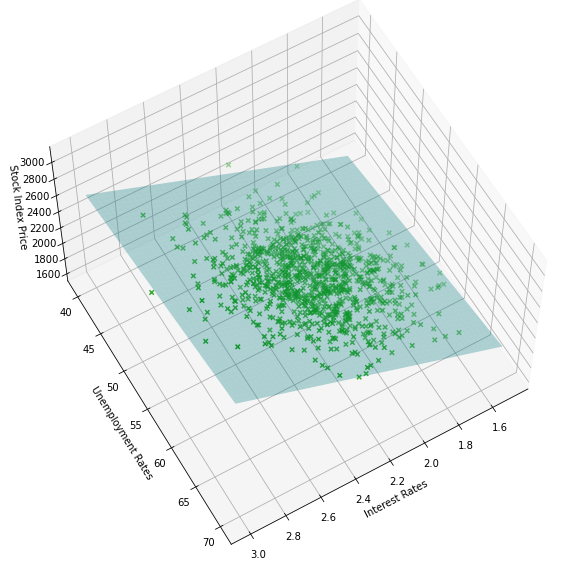

In [187]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( df['Interest Rates'], df['Employment'], df['S&P 500 Price'], c = '#15A10B', marker = 'x')
ax.plot_surface(x_surf, y_surf, fittedY, color = '#038A8E', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Index Price')
ax.view_init(60,60)

In [188]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,721.323796
Employment,12.744154


## END